## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [1]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pathlib

path='/content/drive/MyDrive/Mask_Dataset/'
data_dir = pathlib.Path(path)

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [4]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

8982


In [5]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['without_mask', 'mask_weared_incorrect', 'with_mask']


[2994, 2994, 2994]


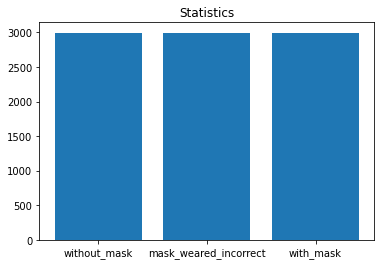

In [6]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

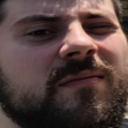

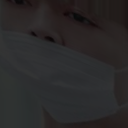

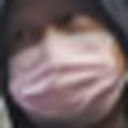

In [7]:
# Check some sample images (Use of cv2)

import cv2
from google.colab.patches import cv2_imshow
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  img_show = this_path + '/' + im_count[0]
  img = cv2.imread(img_show)
  cv2_imshow(img)

# Your code

In [8]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model

img.shape

(128, 128, 3)

In [12]:
# Check if all the images have same shape, else you need to resize them to some common size
# The code provided as it is above in the template will help 

all_shapes = set([])
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count = os.listdir(dir)

  for i in im_count:
    img_show = this_path + '/' + i
    img = cv2.imread(img_show)
    all_shapes.add(img.shape)

In [13]:
# If the shape is variable, reshape to a common size 
# If it is same, prove it

print(len(all_shapes))

1


In [ ]:
# Anything else you want to plot/experiment

### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [14]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential

In [15]:
# Choose and define base model

IMG_HEIGHT = 128
IMG_WIDTH = 128
base_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3),
                                                  include_top=False,
                                                  weights="imagenet")

87924736/87910968 [==============================] - 3s 0us/step


In [16]:
# Print base model summary and have a look at the layers

base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [17]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)

base_model.trainable=False

In [20]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model

model=Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

In [21]:
# Add the final output layer

model.add(Dense(3, activation='softmax'))

In [22]:
# Print your model's summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 22,983,971
Trainable params: 1,181,187
Non-trainable params: 21,802,784
__________________________________

In [29]:
# Compile you model (set the parameters like loss/optimizers/metrics)

model.compile(optimizer = 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [30]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data=ImageDataGenerator(validation_split=0.2)
# Your code 

In [ ]:
# Anything else you wish to try

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [31]:
# Your code

train=data.flow_from_directory('/content/drive/MyDrive/Mask_Dataset/',
                                   target_size=(224,224),
                                   color_mode='rgb',
                                   batch_size=64,
                                   class_mode='categorical')

test=data.flow_from_directory('/content/drive/MyDrive/Mask_Dataset/',
                                  target_size=(224,224),
                                  color_mode='rgb',
                                  batch_size=64,
                                  class_mode='categorical',
                                  subset='validation')

Found 8982 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [34]:
from keras.callbacks import ModelCheckpoint
# ModelCheckpoint is helpful to save the model giving best results (brownie points)

check = ModelCheckpoint('best.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model_history=model.fit(train, validation_data=test, epochs=10, callbacks=[check])

Epoch 1/10
141/141 [==============================] - ETA: 0s - loss: 2.7941 - accuracy: 0.7276
Epoch 1: val_accuracy improved from -inf to 0.82219, saving model to best.h5
141/141 [==============================] - 54s 269ms/step - loss: 2.7941 - accuracy: 0.7276 - val_loss: 0.4306 - val_accuracy: 0.8222
Epoch 2/10
141/141 [==============================] - ETA: 0s - loss: 0.4706 - accuracy: 0.8362
Epoch 2: val_accuracy improved from 0.82219 to 0.90468, saving model to best.h5
141/141 [==============================] - 34s 240ms/step - loss: 0.4706 - accuracy: 0.8362 - val_loss: 0.2813 - val_accuracy: 0.9047
Epoch 3/10
141/141 [==============================] - ETA: 0s - loss: 0.4316 - accuracy: 0.8530
Epoch 3: val_accuracy did not improve from 0.90468
141/141 [==============================] - 34s 241ms/step - loss: 0.4316 - accuracy: 0.8530 - val_loss: 0.4309 - val_accuracy: 0.8724
Epoch 4/10
141/141 [==============================] - ETA: 0s - loss: 0.3015 - accuracy: 0.8951
Epoch 

### Evaluate the performance

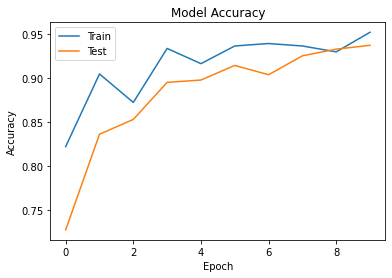

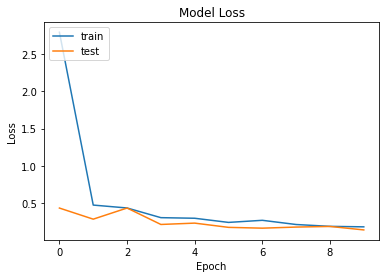

In [39]:
# Plot training & validation loss/accuracy values

plt.plot(model_history.history['val_accuracy'])
plt.plot(model_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# print classification report

In [44]:
# Use the classification report to print precision, recall, f1-score for the three classes(optional, brownie points)

from sklearn.metrics import classification_report, confusion_matrix

predictions=model.predict(test)

Y_pred = model.predict_generator(test, 1794 // 64+1)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['mask_weared_incorrect', 'with_mask', 'without_mask']
print(classification_report(test.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


                       precision    recall  f1-score   support

mask_weared_incorrect       0.33      0.33      0.33       598
            with_mask       0.31      0.33      0.32       598
         without_mask       0.30      0.28      0.29       598

             accuracy                           0.31      1794
            macro avg       0.31      0.31      0.31      1794
         weighted avg       0.31      0.31      0.31      1794

